# Section 5 - Midterm 1 Review
This notebook is a review notebook. In order to serve the purpose of recalling and internalizing knowledge, the section should involve more discussion than usual, between all people in the class, whether students or TA. Most of the code is written for you. Some blanks are meant to be filled, and you should fill them in yourself or discuss as a group before filling in and running the cell.

We will recap:
1. Sampling
2. Linear Regression
3. PCA

You should have downloaded:
- sampling-data1.csv
- sampling-data2.csv
- linreg-data.csv
- spikes.csv

In [328]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 1 Sampling
We consider the problem of inferring whether a sample is from a particular distribution, using histograms. Here are two different approaches:

a. sample histogram vs pdf

b. sample histogram vs histogram

## 1.1: Check sample 1 against normal
### Approach a. histogram vs pdf
The following code loads the samples and plots its histogram against a normal pdf.

**Task:**
- Complete the code to compute sample mean and unbiased standard deviation `mean1` and `std1`.
- Run the cell and respond to the following discussion questions.

_(It is recommended to write your responses to the following prompts on paper/black/whiteboard or your paper. We will compare and contrast with future examples.)_

**Discuss:**
- What difference in **shape** do you see between histogram and normal pdf?
- histogram is skewed to the right, while normal pdf is symmetric and has high kurtosis
- What are the differences between their **tail behaviors**? In particular, what values does the sample take and what does a normal distribution take?
- What **other** similarities or differences do you see?
- Do you think the samples are from a normal distribution?
- samples are not form a normal distribution



(10000,)
[0.2230001  0.08057197 0.21125884 ... 0.06450577 0.08096664 0.11853889]


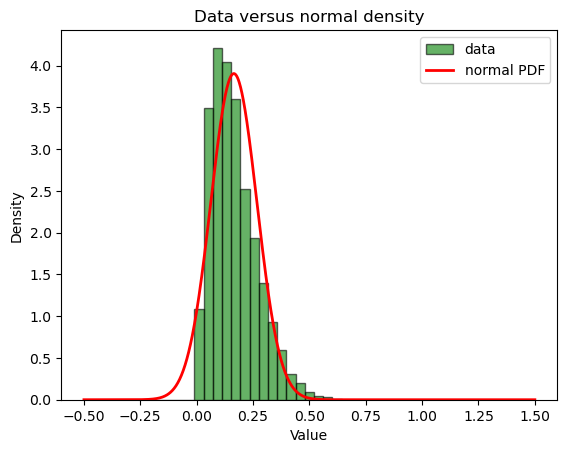

In [329]:
data1 = np.loadtxt('sampling-data1.csv')
print (data1.shape)
print(data1)
mean1 = np.mean(data1, axis = 0, keepdims = True) # TODO mean
std1  = np.std(data1, axis = 0, keepdims = True,ddof= 1) # TODO std

# plot
xmin, xmax = -0.5, 1.5
bin = np.linspace(xmin,xmax,50)

plt.hist(data1, bins=bin, range=(0,1), density=True, alpha=0.6, color='g', edgecolor='black', label='data')
plt.plot(np.linspace(xmin,xmax,1000), norm.pdf(np.linspace(xmin,xmax,1000),loc=mean1, scale=std1),'r-', lw=2, label='normal PDF')
plt.title('Data versus normal density'); plt.xlabel('Value'); plt.ylabel('Density'); plt.legend(); plt.show()

### Approach b. histogram vs histogram
**Task:**
- Generate the same number of samples from a normal distribution with sample mean and std from above.
- Run the cell.

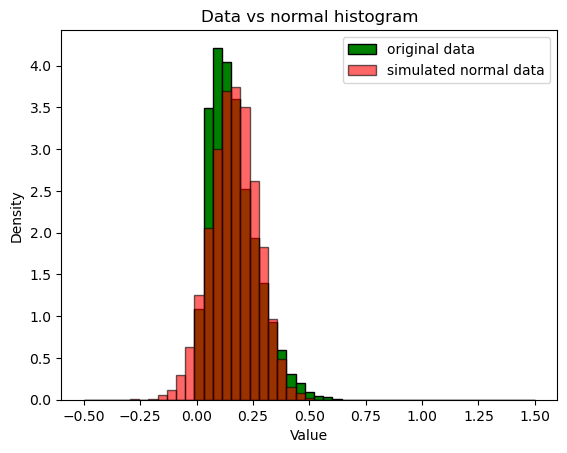

In [330]:
# sample from normal with sample mean and std
ndata = len(data1)
data1_prime = norm.rvs(mean1,std1,ndata) # TODO generate ndata samples from normal(mean,std)

# plot
plt.hist(data1, bins=bin, density=True, alpha=1, color='g', edgecolor='black', label='original data')
plt.hist(data1_prime, bins=bin, density=True, alpha=0.6, color='r', edgecolor='black', label='simulated normal data')
plt.title('Data vs normal histogram'); plt.xlabel('Value'); plt.ylabel('Density'); plt.legend(); plt.show()

## 1.2 Check sample 2 against normal
### Approach a. histogram vs pdf
**Task:**
- Complete the code to compute sample mean and unbiased standard deviation `mean2` and `std2`.
- Run the cell and respond to the following discussion questions.

**Discuss:**
- Same questions as before.

(10000,)


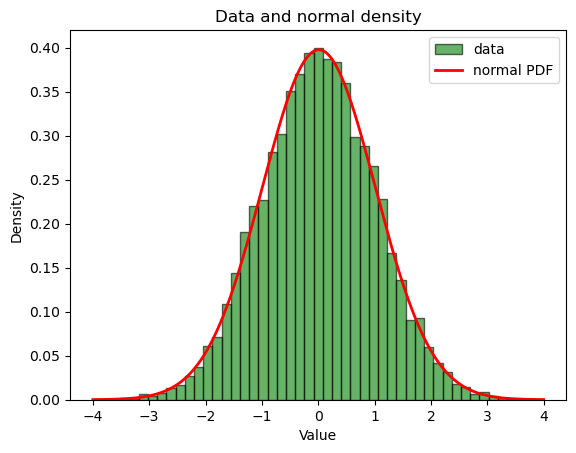

In [331]:
data2 = np.loadtxt('sampling-data2.csv')
print(data2.shape)
mean2 = np.mean(data2,axis=0,keepdims=True)    # TODO mean
std2  = np.std(data2,axis=0,keepdims=True,ddof=1)    # TODO unbiased standard deviation

# plot
xmin, xmax = -4, 4
bin = np.linspace(xmin,xmax,50)

plt.hist(data2, bins=bin, density=True, alpha=0.6, color='g', edgecolor='black', label='data')
plt.plot(np.linspace(xmin,xmax,1000), norm.pdf(np.linspace(xmin,xmax,1000),loc=mean2, scale=std2),'r-', lw=2, label='normal PDF')
plt.title('Data and normal density'); plt.xlabel('Value'); plt.ylabel('Density'); plt.legend(); plt.show()

### Approach b. histogram vs histogram
**Task:**
- Generate the same number of samples from a normal distribution with sample mean and std from above.
- Run the cell.

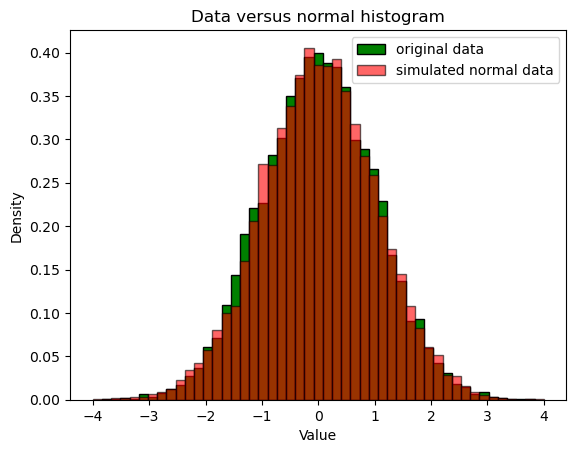

In [332]:
# sample from normal with sample mean and std
data2_prime = norm.rvs(mean2,std2,ndata)       # TODO

# plot
plt.hist(data2, bins=bin, density=True, alpha=1, color='g', edgecolor='black', label='original data')
plt.hist(data2_prime, bins=bin, density=True, alpha=0.6, color='r', edgecolor='black', label='simulated normal data')
plt.title('Data versus normal histogram'); plt.xlabel('Value'); plt.ylabel('Density'); plt.legend(); plt.show()

## 1.3 Kernel Density Estimate (KDE)
**Big idea:** Given some samples $x_1, \dots, x_n$, we can create a guess for what the actual density looks like. 

**Discuss:**
How does the choice of ________ affect the KDE?
1. **kernel function** (e.g., gaussian, triangle, uniform, ...)
- it will affect the smoothness of the KDE, for instance, gaussian kernel will give a smooth KDE while triangle kernel will give a more jagged KDE
2. **bandwidth** 
- it will affect the smoothness of the KDE, for instance, a large bandwidth will give a smooth KDE while a small bandwidth will give a more jagged KDE

See the corresponding lecture and section notebook for more details on implementation.

# 2 Linear Regression

### Step 1: make augmented X
### Step 2: Compute coefficients via magic formula (pseudoinverse)
### Step 3: Use the model! 

First, we load data and plot it.

20
20


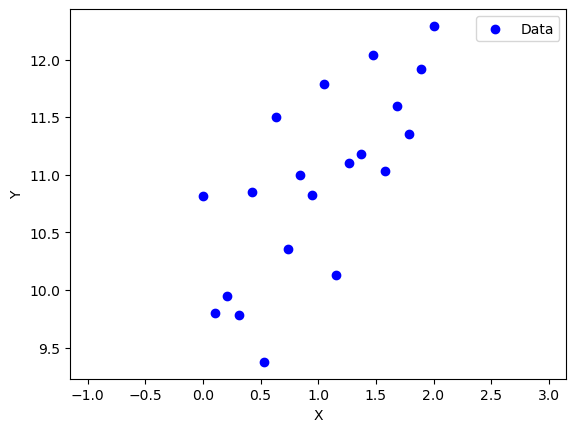

In [333]:
data = np.loadtxt('linreg-data.csv', delimiter=',')
x = data[0,:]
y = data[1,:]
print(x.size)
print(y.size)

plt.scatter(x, y, label='Data', c='b')
plt.xlabel('X'); plt.ylabel('Y'); plt.legend(); 
plt.axis('equal'); plt.show()

## Step 1: make augmented X
The linear regression model is
$$ y = a + bX = a \begin{bmatrix} 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix} + b  \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{bmatrix} .$$

We can rewrite it as $$ y = X' \begin{bmatrix} a \\ b \end{bmatrix} = \begin{bmatrix} 1  & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_n \end{bmatrix} \begin{bmatrix} a \\ b \end{bmatrix}, $$ i.e., $X'$ is $X$ with a column of 1s augmented to the left.

In [334]:
# Append a column of ones to x for the bias term
X = np.ones((x.size,2))            # TODO how should we initialize array?
X[:,1] = x      # TODO what should be in the second column?
X                   # check

array([[1.        , 0.        ],
       [1.        , 0.10526316],
       [1.        , 0.21052632],
       [1.        , 0.31578947],
       [1.        , 0.42105263],
       [1.        , 0.52631579],
       [1.        , 0.63157895],
       [1.        , 0.73684211],
       [1.        , 0.84210526],
       [1.        , 0.94736842],
       [1.        , 1.05263158],
       [1.        , 1.15789474],
       [1.        , 1.26315789],
       [1.        , 1.36842105],
       [1.        , 1.47368421],
       [1.        , 1.57894737],
       [1.        , 1.68421053],
       [1.        , 1.78947368],
       [1.        , 1.89473684],
       [1.        , 2.        ]])

## Step 2: Compute coefficients via magic formula (pseudoinverse)
**Discuss:**
- Which is the intercept?
- Which is the slope?

In [335]:
# Calculate the coefficients using the pseudoinverse
beta = np.linalg.inv(X.T @ X) @ X.T @ y.T       # TODO what is this formula?
a,b = beta
a,b # a is the intercept, b is the slope

(9.97276248455461, 0.9605551972150289)

## Step 3: Use the model! 
We can:
1. predict on test data (plt.scatter)
2. plot the best fit line/curve (plt.plot)     <-- we will do this today

It is basically the same thing. _Usually_, we visualize it differently by using different plotting functions.

(20, 2)
(2, 1)
(20, 1)


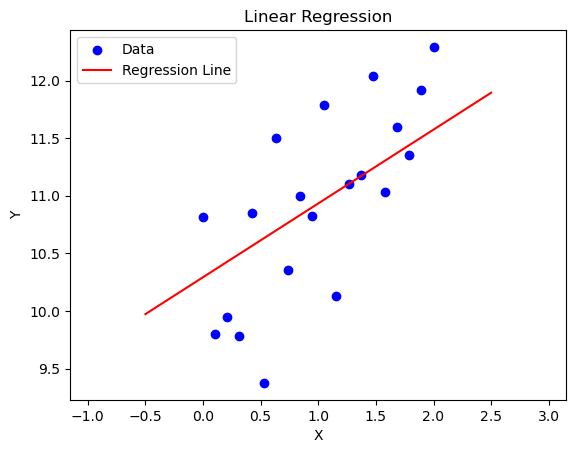

In [336]:
# make augmented matrix for new points
x_test = np.linspace(-0.5, 2.5, 20)
X_test = np.ones((len(x_test),2))
X_test[:,1] = x_test
beta = beta.reshape(-1,1)

print(X_test.shape)
print(beta.shape)

# Create the regression line
y_test = X @ beta              # TODO what is the formula?
print(y_test.shape)
# Plot the dataset and regression line
plt.scatter(x, y, label='Data', c='b')
plt.plot(x_test, y_test, label='Regression Line', c='r')
plt.title('Linear Regression'); plt.xlabel('X'); plt.ylabel('Y'); plt.legend(); plt.axis('equal'); 
plt.show()


### Remark: Common mistake in homework
Append column of 1's in the wrong place (on the right instead of the left)
$$ y = X' \begin{bmatrix} a \\ b \end{bmatrix}  
= \begin{bmatrix} x_1 & \color{red}{1} \\ x_2 & \color{red}{1} \\ \vdots & \color{red}{\vdots}  \\ x_n & \color{red}{1} \end{bmatrix} \begin{bmatrix} a \\ b \end{bmatrix} 
= a \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{bmatrix} + b \color{red}{\begin{bmatrix} 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix}} = aX+b.$$


But $aX + b  \neq a + bX$! So this is a different* model. 

- This ia half a lie. It is a different model, but not tooooo different. If you swap the roles $a=b$ and $b=a$, then you fix the issue. The moral of the story is just be careful about where the 1s column is and how you interpret it. 

- If you put it on the right instead of left, you still get something "correct", just with swapped numbers.

We demonstrate this swap below. Run the cells.

In [337]:
# demostration for a swapping with b, columns are reversed
X_swap = X[:,[1,0]]
X_swap

array([[0.        , 1.        ],
       [0.10526316, 1.        ],
       [0.21052632, 1.        ],
       [0.31578947, 1.        ],
       [0.42105263, 1.        ],
       [0.52631579, 1.        ],
       [0.63157895, 1.        ],
       [0.73684211, 1.        ],
       [0.84210526, 1.        ],
       [0.94736842, 1.        ],
       [1.05263158, 1.        ],
       [1.15789474, 1.        ],
       [1.26315789, 1.        ],
       [1.36842105, 1.        ],
       [1.47368421, 1.        ],
       [1.57894737, 1.        ],
       [1.68421053, 1.        ],
       [1.78947368, 1.        ],
       [1.89473684, 1.        ],
       [2.        , 1.        ]])

In [338]:
beta_swap = np.linalg.pinv(X_swap) @ y
a_swap, b_swap = beta_swap

# Print the calculated coefficients
print('a + bX model (original)')
print(f"a: {a}")
print(f"b: {b}\n")

print('aX + b model (swapped)')
print(f"a: {a_swap}")
print(f"b: {b_swap}")

a + bX model (original)
a: 9.97276248455461
b: 0.9605551972150289

aX + b model (swapped)
a: 0.9605551972150319
b: 9.972762484554602


# 3 PCA
Let's use the data points above and define new array `X`.

**Disucss:**
- What are the dimensions of `X`? What are the rows? What are the columns?

In [339]:
X = data
print(X.shape)
X = X.T
print(X.shape)

(2, 20)
(20, 2)


### Step 1: Center the data
### Step 2: Compute covariance matrix
### Step 3: Get eigen information
### Step 4: Use the model! (dimensionality reduction, etc.)

We can do all of this pretty quickly. 
- Respond to the questions commented next to the code

In [340]:
# what is this step doing?
X_ctd = X - X.mean(axis=0, keepdims=True)       
print(X_ctd.shape)
# TODO what is the formula?
C = X_ctd.T @ X_ctd / (X.shape[0] - 1)

print(C.shape)         

# what does U represent? what is D? what is the relationship of U and W?
U, D, W = np.linalg.svd(C)       
print(U.shape)
print(U)
print(D)
# U represents the orthonormal eigenbasis of the covariance matrix               

(20, 2)
(2, 2)
(2, 2)
[[-0.56557539 -0.8246966 ]
 [-0.8246966   0.56557539]]
[0.9309955 0.1323419]


Let's visualize the PCs

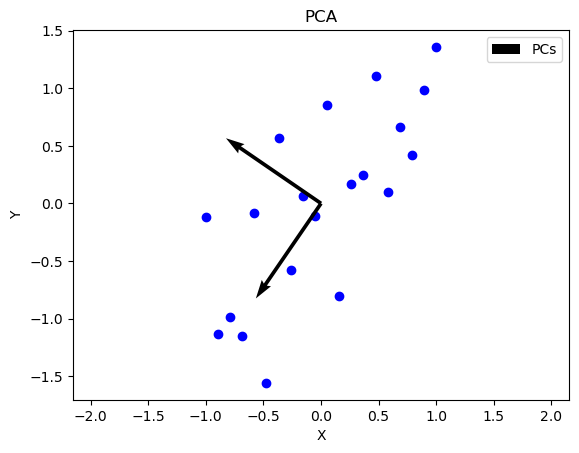

In [341]:
# U[:,0] = -U[:,0]      # this is just to make the visualization nicer, it's still an eigenvector

# Plot the dataset and regression line
plt.scatter(X_ctd[:,0], X_ctd[:,1], c='b')
plt.quiver([0,0], [0,0],U[0,:], U[1,:], color='k', angles='xy', scale_units='xy', scale=1, label='PCs')
plt.title('PCA'); plt.xlabel('X'); plt.ylabel('Y'); plt.axis('equal'); plt.legend()
plt.show()

## 3.2 Projections
We learned that the projection is $U_1U_1^TX$, visualized below.

(20, 2)
[[-0.56557539 -0.8246966 ]
 [-0.8246966   0.56557539]]


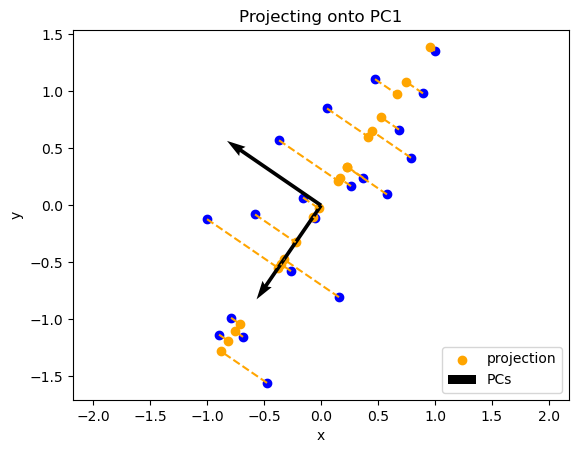

In [342]:
print(X_ctd.shape)
print(U[:])
P1 = X_ctd @ U[:,:1] @ U[:,:1].T        # TODO how do we turn the math into code? You may need to do U[:,:1] instead of U[:,0]

plt.scatter(X_ctd[:,0], X_ctd[:,1], c='b')
plt.scatter(P1[:,0], P1[:,1], c='orange', label='projection')
plt.quiver([0,0], [0,0], U[0,:], U[1,:], color='k', angles='xy', scale_units='xy', scale=1, label='PCs')
plt.plot(np.vstack((X_ctd[:,0], P1[:,0])), np.vstack((X_ctd[:,1], P1[:,1])), '--', c='orange')
plt.xlabel('x'); plt.ylabel('y'); plt.title('Projecting onto PC1');plt.legend(loc='lower right')
plt.axis('equal'); plt.show()

What happens if we do $U_1^TX$ only? Run the cell below.
- Only 1-dimensional!

In [343]:
magnitudes = X_ctd @ U[:,0].T
magnitudes.shape

(20,)

Run the code cell below, which plots 1-dimensional X_proj on the x-axis (red dots).
- We see that it is just the **magnitude** of the projections. Which means to say that the 1-dim X-proj is just the **length** of the true projections (orange dots). 
- To make it a **VECTOR** we just need to multiply the first principal component ($U_1$) to these magnitudes ($U_1^TX$)! Thus, $U_1U_1^TX$.

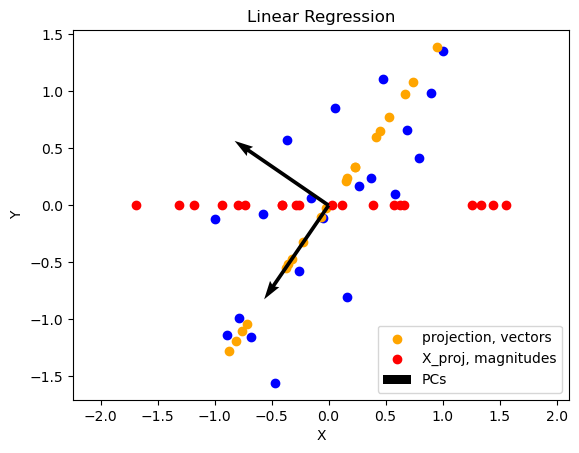

In [344]:
# Plot the dataset and regression line
plt.scatter(X_ctd[:,0], X_ctd[:,1], c='b')
plt.scatter(P1[:,0], P1[:,1], c='orange', label='projection, vectors')
plt.scatter(magnitudes, np.zeros(len(magnitudes)), c='red', label='X_proj, magnitudes')
plt.quiver([0,0], [0,0], U[:,0], U[:,1], color='k', angles='xy', scale_units='xy', scale=1, label='PCs')
plt.title('Linear Regression'); plt.xlabel('X'); plt.ylabel('Y'); plt.axis('equal'); 
plt.legend(loc='lower right')
plt.show()

### (Optional, if you need more convincing) Computed example (numbers 1dp for simplicity)

Setup: 

- eigenvector $U_1 \approx \begin{pmatrix} 0.6 \\ 0.8 \end{pmatrix}$ and 2D centered data $ X \approx \begin{pmatrix} -1 & -0.9 & -0.8 & \cdots & 0.9 & 1 \\ -0.1 & -1.1 & -1 & \cdots & 1 & 1.4  \end{pmatrix}$. 

Then the **<u>magnitudes</u>** are
$$
U_1^TX \approx \begin{pmatrix} 0.6 & 0.8 \end{pmatrix} \begin{pmatrix}  \color{blue}{-1} & -0.9 & \color{blue}{-0.8} & \cdots & 0.9 & \color{blue}{1} \\ \color{blue}{-0.1} & -1.1 & \color{blue}{-1} & \cdots & 1 & \color{blue}{1.4}  \end{pmatrix} \approx  \color{red}{\begin{pmatrix}  -0.7 & -1.4 & -1.3 & \cdots & 1.3 & 1.7 \end{pmatrix}}.
$$
But these are only magintudes! So the **<u>actual projected vectors</u>** are
$$
U_1U_1^TX \approx \begin{pmatrix} 0.6 \\ 0.8 \end{pmatrix} \begin{pmatrix}  -0.7 & -1.4 & -1.3 & \cdots & 1.3 & 1.7 \end{pmatrix} \approx \begin{pmatrix}  \color{orange}{-0.4} & -0.8 & \color{orange}{-0.7} & \cdots & 0.7 & \color{orange}{1} \\  \color{orange}{-0.5} & -1.2 & \color{orange}{-1} & \cdots & 1.1 & \color{orange}{1.4} \end{pmatrix}.
$$

## 3.3 Scree plot
**Goal:** decide how many principal components we should keep in dimensionality reduction. 

We bring back the spikes dataset that we've seen before and use sklearn PCA.

**Task:**
- Complete the code to
    - create pca object
    - fit data
    - compute eigendecomposition
- Tip: package automatically centers data for you.

In [345]:
from sklearn import decomposition

X_spike = np.loadtxt('spikes.csv', delimiter=',')
n, m = X_spike.shape
print(X_spike.shape)
# sklearn PCA
pca = decomposition.PCA()                            # TODO create model and fit in one line
pca.fit(X_spike)                                      # TODO fit model
evals, evecs = pca.explained_variance_, pca.components_      # TODO get evals and evecs
evecs = evecs.T

(70, 3298)


Run the cell below to generate the scree plots.

**Discuss:**
- What is each plot representing?
- What is the units of the y-axis? Why is it that way?

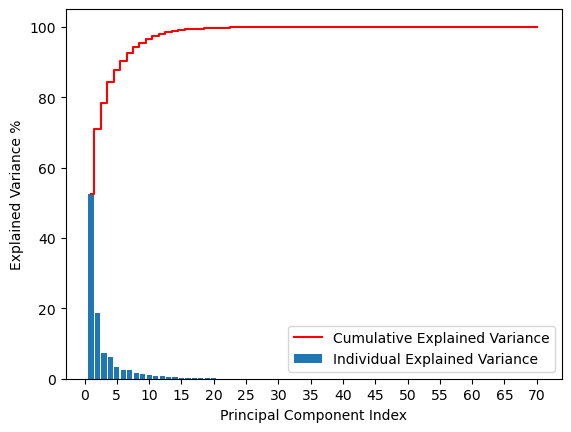

In [346]:
# explained variance plot, in percentage
exp_var = (evals / np.sum(evals)) * 100
cum_exp_var = np.cumsum(exp_var)

plt.bar(range(1, n+1), exp_var, align='center',label='Individual Explained Variance')
plt.step(range(1, n+1), cum_exp_var, where='mid', label='Cumulative Explained Variance', color='red')

plt.xlabel('Principal Component Index'); plt.ylabel('Explained Variance %'); plt.legend(loc='best'); 
plt.xticks(range(0,n+1,5))
plt.show()

### How to choose number of PCs

There is no hard-and-fast rule for how many principal components you should choose when reducing the dimensionality. This is when math/data science becomes more of an art.

**Discuss:** 
1. Look at where the individual explained variance has an "elbow". At which principal component index do you see that happening?
2. Look at where the cumulative variance exceeds some "high enough" value (≈80-90%). At which principal component index do you see that happening?

**(For fun) Further discussion:** 
- In what scenarios would the two approaches for choosing PCs above give the same number? In what situations would they give different numbers?
- What other methods do you know/think we can use to choose the number of PCs?